# 6.5 Unsupervised Machine Learning - Clustering

## Table of contents
1. [Importing Libraries & Data](#imports)
2. [Data wrangling](#paragraph1)
3. [The elbow technique](#paragraph2)
4. [k-means clustering](#paragraph3)
5. [Visualisations](#paragraph4)
6. [Summary & Outlook](#paragraph5)

### 1. Importing Libraries & Data <a name="imports"></a>

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [51]:
# This option ensures the graphs created are displayed in the notebook without the need to "call" them specifically
%matplotlib inline

In [52]:
path = r'C:\Users\deuts\Desktop\Airbnb'

In [53]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'airbnb_df.pkl'))

### 2. Data Wrangling <a name="paragraph1"></a>

In [54]:
# Displaying head of data set
pd.set_option('display.max_columns', 500)
df.head()

,id,name,host_id,host_since,street,neighbourhood,city,state,zipcode,country,latitude,longitude,property_type,bedrooms,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,host_listings,reviews_per_month,price_group
0,145320,In the middle of it all - with a view!,703851,2011-06-15,"Stockholm, Stockholms laen, Sweden",Soedermalm,Stockholm,Stockholms laen,118 53,Sweden,5.931.364,1.805.256,Apartment,1.0,1285.0,2,0,72,97.0,1,2,High Price
2,170651,Petit Charm Rooftop next to heaven,814021,2011-07-13,"Stockholm, Stockholm County, Sweden",Soedermalm,Stockholm,Stockholm County,11737,Sweden,5.931.568,1.803.138,Apartment,1.0,745.0,3,197,32,93.0,1,0,Middle Price
3,206221,Doubleroom at Soedermalm &trendySofo,1022374,2011-08-26,"Stockholm, Stockholm County, Sweden",Soedermalm,Stockholm,Stockholm County,11639,Sweden,5.931.226,1.807.942,Bed and breakfast,1.0,667.0,3,332,78,98.0,1,0,Middle Price
4,220851,One room in appartement,412283,2011-02-27,"Stockholm, Stockholm County, Sweden",Kungsholmen,Stockholm,Stockholm County,11341,Sweden,5.933.376,1.803.816,Apartment,1.0,598.0,3,336,45,93.0,1,0,Middle Price
5,259722,Near shopping-IT Business(Bunk bed),1261494,2011-10-07,"Stockholm, Stockholm County, Sweden",Rinkeby-Kista,Stockholm,Stockholm County,16474,Sweden,5.941.003,179.366,Apartment,1.0,226.0,21,307,23,92.0,1,0,Low Price


In [55]:
df_comp = df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 20, 21]], axis=1)
df_comp

,id,bedrooms,price,minimum_nights,number_of_reviews,review_scores_rating,host_listings
0,145320,1.0,1285.0,2,72,97.0,1
2,170651,1.0,745.0,3,32,93.0,1
3,206221,1.0,667.0,3,78,98.0,1
4,220851,1.0,598.0,3,45,93.0,1
5,259722,1.0,226.0,21,23,92.0,1
...,...,...,...,...,...,...,...
5454,37900778,2.0,1197.0,1,2,70.0,1
5455,37929192,1.0,245.0,1,1,100.0,3
5456,37930728,1.0,245.0,1,1,80.0,3
5457,37937026,1.0,461.0,1,1,100.0,1


In [56]:
df_comp.describe()

,id,bedrooms,price,minimum_nights,number_of_reviews,review_scores_rating,host_listings
count,5.213000e+03,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000
mean,1.872682e+07,1.400537,990.957990,3.094763,15.681565,95.672549,1.271053
std,1.063092e+07,1.009707,525.615798,2.531050,21.688435,6.544259,1.015233
min,1.453200e+05,0.000000,98.000000,1.000000,1.000000,20.000000,1.000000
25%,9.400718e+06,1.000000,598.000000,2.000000,3.000000,94.000000,1.000000
50%,1.886122e+07,1.000000,902.000000,2.000000,7.000000,98.000000,1.000000
75%,2.666322e+07,2.000000,1197.000000,4.000000,18.000000,100.000000,1.000000
max,3.796416e+07,10.000000,2992.000000,21.000000,135.000000,100.000000,10.000000


#### The 'price' variables is larger, than the other variables, but should still be in the right range.

### 3. The elbow technique <a name="paragraph2"></a>

In [57]:
num_cl = range(1, 10) # Defines range of potential clusters
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in assigned range

In [58]:
# Creating a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_comp).score(df_comp) for i in range(len(kmeans))]
score

[-5.89042050407104e+17,
 -1.617308611873937e+17,
 -6.890908226439205e+16,
 -3.4090604648704732e+16,
 -1.9822268073349656e+16,
 -1.4178259700513012e+16,
 -1.0100375986309364e+16,
 -7976795782083624.0,
 -6386016618897679.0]

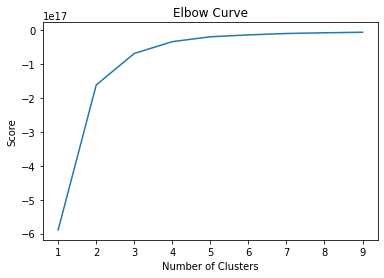

In [59]:
# Ploting elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### There is a big jump from two to three clusters, but after that, the curve straightens out, this means that the optimal count of clusters is three.

### 4. k-means clustering <a name="paragraph3"></a>

In [60]:
# Creating  k-means object
kmeans = KMeans(n_clusters = 3) 

In [61]:
# Fiting the k-means object to the data
kmeans.fit(df_comp)

KMeans(n_clusters=3)

In [62]:
# Attaching new 'clusters' colum to compressed data frame 'df_comp'
df_comp['clusters'] = kmeans.fit_predict(df_comp)

In [63]:
# Also attaching new 'clusters' colum to orignal data frame 'df_comp' as it's maybe needed for futur analyses 
df['clusters'] = kmeans.fit_predict(df_comp)

In [64]:
# Checking head of compressed data frame 'df_comp'
df_comp.head()

,id,bedrooms,price,minimum_nights,number_of_reviews,review_scores_rating,host_listings,clusters
0,145320,1.0,1285.0,2,72,97.0,1,1
2,170651,1.0,745.0,3,32,93.0,1,1
3,206221,1.0,667.0,3,78,98.0,1,1
4,220851,1.0,598.0,3,45,93.0,1,1
5,259722,1.0,226.0,21,23,92.0,1,1


In [65]:
# Counting values of clusters
df_comp['clusters'].value_counts()

1    2058
0    1919
2    1236
Name: clusters, dtype: int64

### 5. Visualisations <a name="paragraph4"></a>

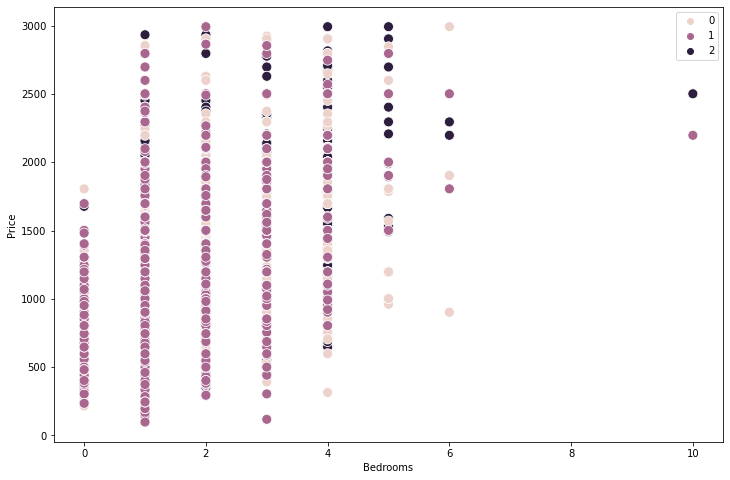

In [66]:
# Plotting  clusters for the "price" and "bedrooms" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['bedrooms'], y=df['price'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Bedrooms') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### Cluster number 2 makes up most of the data entries mainly in the price under 2000 SEK and under 5 bedrooms, but there are also exceptions and the other two clusters are all over the place. There are no clear clusters to be identied, which could generate insights.

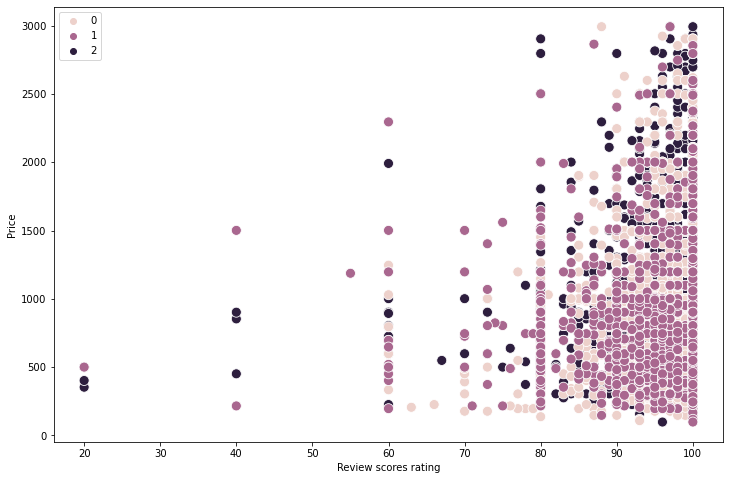

In [67]:
# Plotting clusters for the "price" and "review_scores_rating" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['review_scores_rating'], y=df['price'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Review scores rating') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### Cluster number 2 again makes up most of the data entries mainly with review socres between 80 and 100 and under a price of 2000 SEK but there are also exceptions and the other two clusters are all over the place. There are no clear clusters to be identied, which could generate insights.

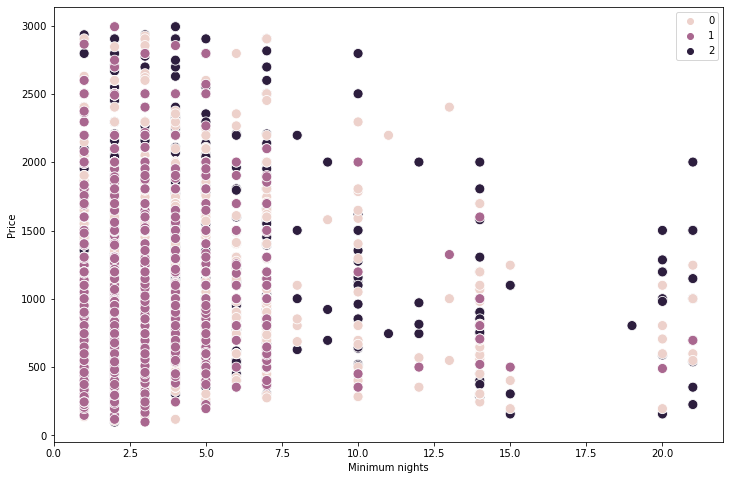

In [68]:
# Plotting clusters for the "price" and "minimum_nights" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['minimum_nights'], y=df['price'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Minimum nights') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

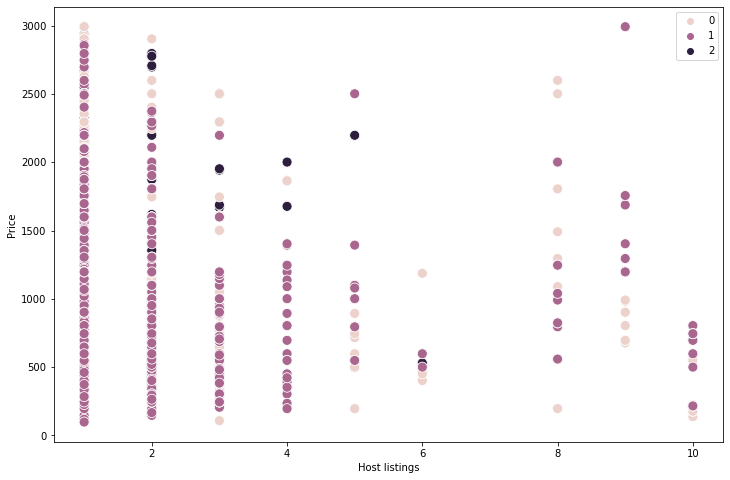

In [69]:
# Plotting clusters for the "price" and "host_listings" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['host_listings'], y=df['price'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Host listings') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### Here again cluster number 2 makes up most of the data entries mainly under 20 listings per host, but there are also exceptions and the other two clusters are all over the place. There are no clear clusters to be identied, which could generate insights.

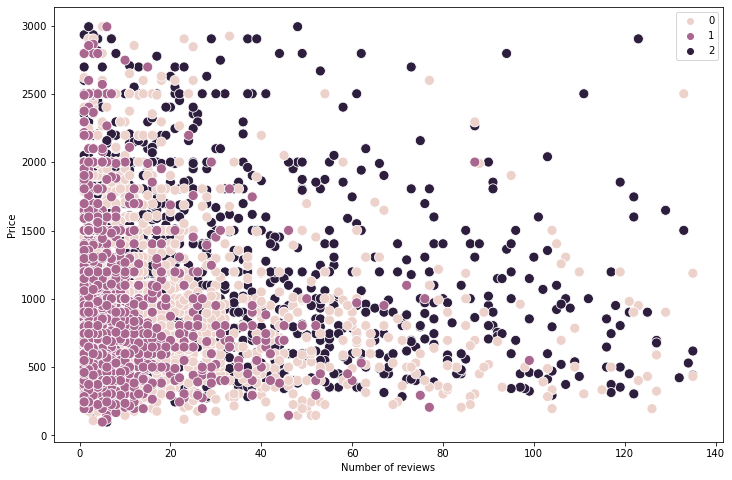

In [70]:
# Plotting clusters for the "price" and "number_of_reviews" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['number_of_reviews'], y=df['price'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of reviews') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### Cluster number 0 and 1 are taking up all of the listings with reviews between 50 and 200 and a price per listing under 2000 SEK where almost no data entries of cluster number 2 can be found. Cluster number 1 takes up all of the listings with reviews up to 25 and prices up to 2500 SEK. Clusters number 0 and 1 could be identified as listings with higher number of reviews and lower prices. But also a lot of the data entries of these two clusters can be found elsewhere, so there is no clear insight to be found.

In [71]:
df_comp.loc[df_comp['clusters'] == 2, 'cluster'] = 'Cluster 2 (dark purple)'
df_comp.loc[df_comp['clusters'] == 1, 'cluster'] = 'Cluster 1 (purple)'
df_comp.loc[df_comp['clusters'] == 0, 'cluster'] = 'Cluster 3 (pink)'

In [72]:
df.head()

,id,name,host_id,host_since,street,neighbourhood,city,state,zipcode,country,latitude,longitude,property_type,bedrooms,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,host_listings,reviews_per_month,price_group,clusters
0,145320,In the middle of it all - with a view!,703851,2011-06-15,"Stockholm, Stockholms laen, Sweden",Soedermalm,Stockholm,Stockholms laen,118 53,Sweden,5.931.364,1.805.256,Apartment,1.0,1285.0,2,0,72,97.0,1,2,High Price,2
2,170651,Petit Charm Rooftop next to heaven,814021,2011-07-13,"Stockholm, Stockholm County, Sweden",Soedermalm,Stockholm,Stockholm County,11737,Sweden,5.931.568,1.803.138,Apartment,1.0,745.0,3,197,32,93.0,1,0,Middle Price,2
3,206221,Doubleroom at Soedermalm &trendySofo,1022374,2011-08-26,"Stockholm, Stockholm County, Sweden",Soedermalm,Stockholm,Stockholm County,11639,Sweden,5.931.226,1.807.942,Bed and breakfast,1.0,667.0,3,332,78,98.0,1,0,Middle Price,2
4,220851,One room in appartement,412283,2011-02-27,"Stockholm, Stockholm County, Sweden",Kungsholmen,Stockholm,Stockholm County,11341,Sweden,5.933.376,1.803.816,Apartment,1.0,598.0,3,336,45,93.0,1,0,Middle Price,2
5,259722,Near shopping-IT Business(Bunk bed),1261494,2011-10-07,"Stockholm, Stockholm County, Sweden",Rinkeby-Kista,Stockholm,Stockholm County,16474,Sweden,5.941.003,179.366,Apartment,1.0,226.0,21,307,23,92.0,1,0,Low Price,2


In [73]:
df['clusters'].value_counts()

2    2056
0    1915
1    1242
Name: clusters, dtype: int64

In [74]:
df_comp.groupby('cluster').agg({'bedrooms':['mean', 'median'], 
                                'price':['mean', 'median'], 
                                'minimum_nights':['mean', 'median'],
                                'number_of_reviews':['mean', 'median'],
                                'review_scores_rating':['mean', 'median'],
                                'host_listings':['mean', 'median']})

bedrooms               price        minimum_nights  \
                             mean median         mean median           mean   
cluster                                                                       
Cluster 1 (purple)       1.515549    1.0  1068.802721  951.0       3.354227   
Cluster 2 (dark purple)  1.245146    1.0   922.292071  804.0       2.559061   
Cluster 3 (pink)         1.377280    1.0   951.701407  863.0       3.161542   

                               number_of_reviews        review_scores_rating  \
                        median              mean median                 mean   
cluster                                                                        
Cluster 1 (purple)         3.0         20.328474   11.0            95.259961   
Cluster 2 (dark purple)    2.0          7.847087    4.0            95.554207   
Cluster 3 (pink)           2.0         15.744138    8.0            96.191245   

                               host_listings         
                        median          mean median  
cluster                                              
Cluster 1 (purple)        97.0      1.129252    1.0  
Cluster 2 (dark purple)  100.0      1.487864    1.0  
Cluster 3 (pink)          98.0      1.283481    1.0

####  The three clusters are pretty similiar with some exceptions.
#####  - There is difference of 1 of minimum nights spent between Cluster 1 & 2 and 3 in the median
#####  - There is a bigger difference in number of reviews: Cluster 2 only has 4.5 reviews in the median, as cluster 1 has almost 2x that and cluster 3 more than 2x
##### - Cluster 3 has a bit higher prices in the median with + ~100 SEK

In [75]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'airbnb_df_clusters.csv'))

### 6. Summary & Outlook<a name="paragraph5"></a>

#### There isn't that big of a potential when grouping these listings as clusters, but some smaller changes between the clusters have been discovered, which can be further investigated and also compared to Airbnb listings in other big cities. For a Analytics pipeline the median price per listings compared to the review scores rating on a daily basis and in a year of year comparison can be interessting. Also the exploration of seasonal price increases for example during the christmas or holiday season. Also the demand of booking would be interessting to monitor.